In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import time
from os import listdir


from scipy import stats
from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
def get_pulse_data(filename):
    fid = open(filename, 'rb')
    start = time.time()
    
    num = 0
    pulseheight = []
    realtime = []
    da1 = []
    da2 = []
    fid.seek( 256, 0 )
    data_array0 = np.fromfile(fid, dtype=np.uint32)

    RTword = np.where((data_array0 >= 2**31) & (data_array0 < (2**31+2**30)))
    RTwordcounts = RTword[0]    
    fid.seek( 256, 0 )
    # bar = pbar.ProgressBar(max_value=RTwordcounts.size).start()
    for i in tqdm_notebook(range(RTwordcounts.size)):
        fid.seek(RTwordcounts[i]*4, 1)
        da = np.fromfile(fid, dtype = np.uint16, count = 1)
        realtime10ms = da
        da1.append(da[0])

        fid.seek(14, 1)
        # realtime200ns = []
        while 1:
            # data_array00 = np.fromfile(fid, dtype=np.uint32, count = 1)
            data_array1 = np.fromfile(fid, dtype=np.uint16, count=1)
            data_array2 = np.fromfile(fid, dtype=np.uint16, count=1)
            # int(data_array1, data_array2)
            if data_array2 < 2**15 + 2**14:
                break
            realtime200ns = data_array1[0]
            num = data_array2 - (2 ** 15 + 2 ** 14)
            # 自动排除 大于 250mv 的电压值
            if num < 250:
                pulseheight.append(num)
        fid.seek(256, 0)
    pulseheight = np.array(pulseheight)
    pulseheight = pulseheight.T
    print('Time: %02d:%02d' % ((time.time() - start) // 60, (time.time() - start) % 60))  
    return pulseheight


In [18]:
pulse_Cs137 = get_pulse_data('../Cs137data/lis/Cs137-10min-01.Lis')

100%|███████████████████████████████████████████████████████████████████████████| 78073/78073 [05:46<00:00, 225.30it/s]


time is 349.764s


In [85]:
pulse_bp = get_pulse_data('../Cs137data/lis/BenDi_10min_02.Lis')

100%|██████████████████████████████████████████████████████████████████████████| 61340/61340 [00:40<00:00, 1512.20it/s]


Time: 00:40


In [6]:
for i in tqdm(range(1000)):
    i += 1    

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1003422.01it/s]


In [33]:
pulse_Cs137.shape, pulse_bp.shape

((1, 5716374), (1, 557836))

In [40]:
pulse_Cs137.shape[1] / pulse_bp.shape[1]

10.247409632938712

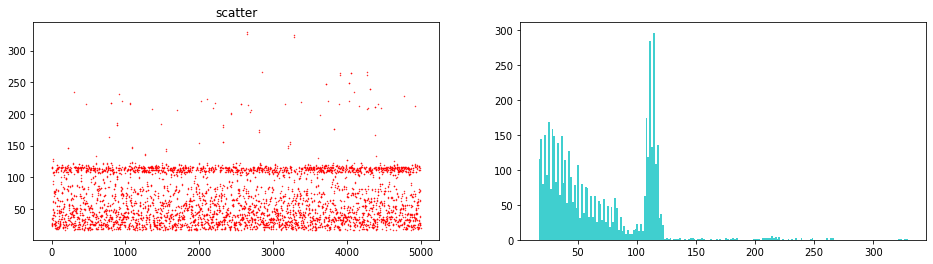

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(5000), pulse_Cs137[0, : 5000], s=0.2, c='r')
axes[0].set_title('scatter')
# n, bins, patches = axes[1].hist(pulse_Cs137[0, : 5000], 200, density=True, histtype='stepfilled', facecolor='c', alpha=0.75)
# the histogram of the data
n, bins, patches = axes[1].hist(pulse_Cs137[0, : 5000], 200, facecolor='c', alpha=0.75)
# add a 'best fit' line
plt.show()

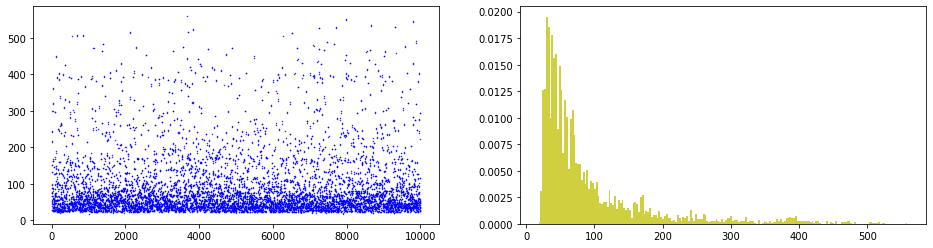

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(range(10000), pulse_bp[0, : 10000], s=0.2, c='b')
axes[1].hist(pulse_bp[0, : 5000], 200, density=True, histtype='stepfilled', facecolor='y', alpha=0.75)
plt.show()

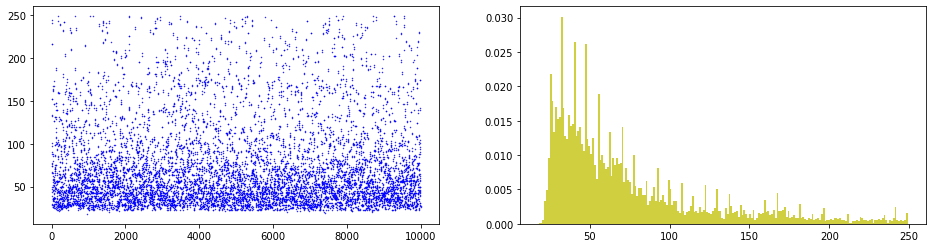

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(range(10000), pulse_bp[0, : 10000], s=0.2, c='b')
axes[1].hist(pulse_bp[0, : 5000], 200, density=True, histtype='stepfilled', facecolor='y', alpha=0.75)
plt.show()

In [42]:
filename = listdir('../Cs137data/lis')
filename

['BenDi_10min_01.Lis',
 'BenDi_10min_02.Lis',
 'Cs-180s-000.Lis',
 'Cs-180s-001.Lis',
 'Cs137-10min-01.Lis',
 'Cs137-180s-s1.Lis',
 'Cs_Go_10min_01.Lis',
 'Eu155-10min-01.Lis',
 'G60-180s-01.Lis',
 'G60-180s-02.Lis',
 'G60-180s-03.Lis']

In [44]:
pulse_EuNa = get_pulse_data('../Cs137data/lis/Eu155-10min-01.Lis')

100%|██████████████████████████████████████████████████████████████████████████| 62230/62230 [00:53<00:00, 1159.38it/s]


Time: 00:54


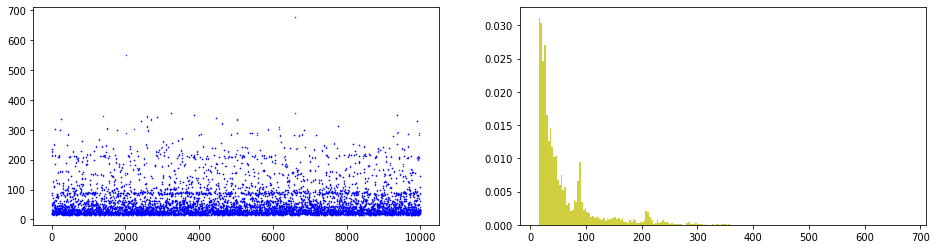

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(range(10000), pulse_EuNa[0, : 10000], s=0.2, c='b')
axes[1].hist(pulse_EuNa[0, : 10000], 200, density=True, histtype='stepfilled', facecolor='y', alpha=0.75)
plt.show()

In [4]:
pulse_Co60 = get_pulse_data('../Cs137data/lis/Co60_10min_03.Lis')


Time: 10:45


In [5]:
pulse_Co60.shape

(1, 10229690)

In [73]:
array = pulse_Co60[0, 0:10000]
array = array.reshape(1, 10000)
fd = pd.DataFrame(array)
fd

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,62,63,63,63,168,45,43,187,46,45,...,32,29,230,229,195,195,220,241,244,91


In [74]:
fd.to_excel('F:/研究生杂文件/核信号采集课程设计/data_10000.xlsx')

In [18]:
sum_channel = pulse_Co60.cumsum()
sum_channel.shape

(10229690,)

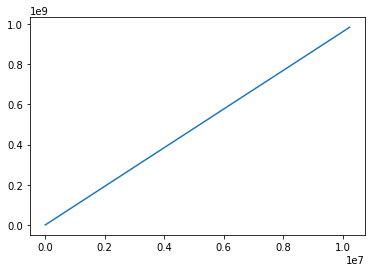

In [19]:
plt.plot(sum_channel)
plt.show()

In [63]:
hist,bins = np.histogram(pulse_Co60[0, 0:5000], bins = 1024)
hist, bins

(array([4, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([ 14.        ,  14.22753906,  14.45507812, ..., 246.54492188,
        246.77246094, 247.        ]))

In [71]:
hist.shape

(1024,)

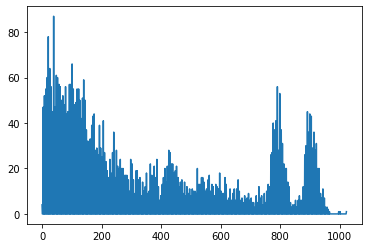

In [72]:
plt.plot(hist)
plt.show()

In [68]:
fr1 = pd.DataFrame(hist.reshape(1, 1024))
fr1

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,4,0,0,0,47,0,0,0,52,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
fr1.to_excel('F:/研究生杂文件/核信号采集课程设计/data_5000.xlsx')

In [57]:
np.histogram?

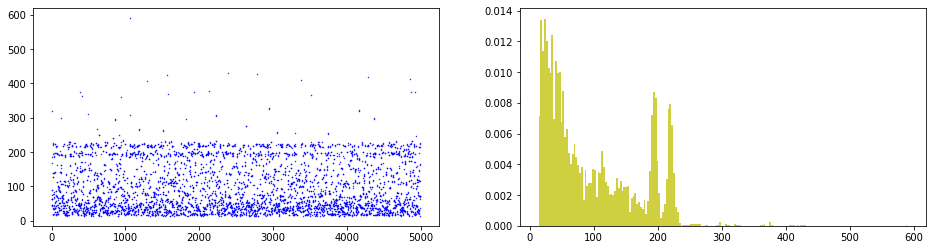

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(range(5000), pulse_Co60[0, : 5000], s=0.2, c='b')
axes[1].hist(pulse_Co60[0, : 5000], 200, density=True, histtype='stepfilled', facecolor='y', alpha=0.75)
plt.show()

In [88]:
array = np.zeros((pulse_Co60.shape[1]//5000, 5000))
for i in tqdm(range(pulse_Co60.shape[1]//5000)):
    array[i] = pulse_Co60[0, i * 5000 : i * 5000 + 5000]
array.shape, array

100%|███████████████████████████████████████████████████████████████████████████| 2061/2061 [00:00<00:00, 29509.93it/s]


((2061, 5000), array([[ 62.,  63.,  63., ...,  37.,  15., 216.],
        [217., 197., 199., ..., 186.,  29.,  29.],
        [202., 203., 138., ..., 128., 127., 112.],
        ...,
        [ 27.,  28.,  24., ..., 200., 198.,  51.],
        [ 24.,  23., 113., ...,  78., 115., 118.],
        [156.,  29.,  29., ..., 193., 195.,  14.]]))

### 一次读取文件夹里面的所有数据，并且全部存入数组中

In [4]:
fileName = listdir('../Cs137data/lis/')
len(fileName), fileName

(10,
 ['BenDi_10min_02.Lis',
  'Cs137_10min_01.Lis',
  'Cs137_180s_s1.Lis',
  'CsGo_10min_01.Lis',
  'Cs_180s_000.Lis',
  'Cs_180s_001.Lis',
  'Eu155_10min_01.Lis',
  'G60_10min_03.Lis',
  'G60_180s_01.Lis',
  'G60_180s_02.Lis'])

In [5]:
fileName[0].split('_')

['BenDi', '10min', '02.Lis']

In [6]:
a = ['BenDi', 'Cs137', 'Co60', 'Eu155']
a.sort()
a

['BenDi', 'Co60', 'Cs137', 'Eu155']

In [8]:
start  = time.time()
fileName = listdir('../Cs137data/lis/')
dataSet = []
for i in tqdm range(len(fileName)):
    nuclideName = fileName[i].split('_')[0]
    print("The nuclide data being read is %s" % fileName[i])
    pulse = get_pulse_data('../Cs137data/lis/' + fileName[i]).tolist()
    pulse.append(nuclideName)
    dataSet.append(pulse)
    print(dataSet[i][-1])
print("Time: %02d:%02d" % ((time.time() - start)//60, (time.time() - start) % 60))

The nuclide data being read is BenDi_10min_02.Lis


100%|██████████████████████████████████████████████████████████████████████████| 61340/61340 [00:38<00:00, 1585.07it/s]


Time: 00:39
BenDi
The nuclide data being read is Cs137_10min_01.Lis


100%|███████████████████████████████████████████████████████████████████████████| 78073/78073 [05:45<00:00, 226.11it/s]


Time: 05:48
Cs137
The nuclide data being read is Cs137_180s_s1.Lis


100%|███████████████████████████████████████████████████████████████████████████| 23880/23880 [01:50<00:00, 217.03it/s]


Time: 01:51
Cs137
The nuclide data being read is CsGo_10min_01.Lis


100%|█████████████████████████████████████████████████████████████████████████| 112028/112028 [10:51<00:00, 172.08it/s]


Time: 10:57
CsGo
The nuclide data being read is Cs_180s_000.Lis


100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [01:46<00:00, 223.65it/s]


Time: 01:47
Cs
The nuclide data being read is Cs_180s_001.Lis


100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [01:46<00:00, 223.61it/s]


Time: 01:47
Cs
The nuclide data being read is Eu155_10min_01.Lis


100%|██████████████████████████████████████████████████████████████████████████| 62230/62230 [00:52<00:00, 1182.20it/s]


Time: 00:53
Eu155
The nuclide data being read is G60_10min_03.Lis


100%|█████████████████████████████████████████████████████████████████████████| 137617/137617 [10:20<00:00, 221.65it/s]


Time: 10:26
G60
The nuclide data being read is G60_180s_01.Lis


100%|███████████████████████████████████████████████████████████████████████████| 23660/23660 [01:45<00:00, 224.17it/s]


Time: 01:46
G60
The nuclide data being read is G60_180s_02.Lis


100%|███████████████████████████████████████████████████████████████████████████| 23635/23635 [01:43<00:00, 227.60it/s]


Time: 01:44
G60
Time: -38:16


In [13]:
len(dataSet[0][0])

520010

In [23]:

dataSet[0][0].append(dataSet[0][1])
dataSet[0][0][-1]

'BenDi'

In [26]:
keyValue = {'BenDi': 0, 'Cs137': 1, 'CsGo': 2, 'Cs': 1, 'G60': 3, 'Eu155': 4}
keyValue.keys()

dict_keys(['BenDi', 'Cs137', 'CsGo', 'Cs', 'G60', 'Eu155'])

In [66]:
num = 0
for i in range(len(dataSet)):
    num = num + len(dataSet[i][0])//5000
num

7421

In [67]:
dataSet1 = dataSet

In [77]:
keyValue = {'BenDi': 0, 'Cs137': 1, 'CsGo': 2, 'Cs': 1, 'G60': 3, 'Eu155': 4}

In [76]:
array = np.zeros((len(dataSet1[0][0])//5000, 5001))
for i in range(len(dataSet1[0][0])//5000):
    list2 = dataSet1[0][0][i * 5000: i * 5000 + 5000]
    list2.append(keyValue[dataSet1[0][1]])
    array[i, :] = np.array(list2)
array.shape, array[0]

((104, 5001), array([ 97., 101.,  77., ...,  44.,  77.,   0.]))

#### dataSet 的格式是：dataSet[[[序列数据], '核素名称'], [[序列数据], '核素名称']......]

In [124]:
num0 = 0
dataSetArray1 = np.zeros((1, 5001))
for j in tqdm_notebook(range(len(dataSet1))):
    num0 = len(dataSet1[j][0]) // 5000
    print(dataSet1[j][1], j, num0)
    array = np.zeros((num0, 5001))
    
    for i in tqdm_notebook(range(num0)):
        list1 = dataSet1[j][0][i * 5000: i * 5000 + 5000]
        list1.append(keyValue[dataSet1[j][1]])
        array[i, :] = np.array(list1)
    dataSetArray1 = np.vstack((dataSetArray1, array))

BenDi 0 104



Cs137 1 1141



Cs137 2 365



CsGo 3 2188



Cs 4 358



Cs 5 358



Eu155 6 159



G60 7 2045



G60 8 354



G60 9 349


In [117]:
dataSetArray = np.delete(dataSetArray1, 0, axis=0)

In [119]:
dataSetArray.shape, dataSetArray[0]

((7421, 5001), array([ 97., 101.,  77., ...,  44.,  77.,   0.]))

### 保存数据到 .csv

In [121]:
fid = pd.DataFrame(dataSetArray)
fid.to_csv('../Cs137data/re_bp_SetData.csv')

In [145]:
dataSetCsv = pd.read_csv('../Cs137data/re_bp_SetData.csv')
dataSetCsv.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,97.0,101.0,77.0,74.0,90.0,88.0,30.0,29.0,241.0,...,37.0,33.0,195.0,196.0,34.0,31.0,42.0,44.0,77.0,0.0
1,1,79.0,74.0,141.0,143.0,235.0,237.0,32.0,31.0,68.0,...,90.0,88.0,31.0,31.0,58.0,60.0,28.0,27.0,26.0,0.0
2,2,82.0,85.0,51.0,51.0,52.0,53.0,119.0,119.0,152.0,...,38.0,67.0,66.0,134.0,134.0,32.0,33.0,98.0,100.0,0.0
3,3,46.0,49.0,30.0,29.0,85.0,85.0,62.0,62.0,245.0,...,34.0,103.0,101.0,52.0,52.0,82.0,78.0,46.0,46.0,0.0
4,4,50.0,50.0,232.0,232.0,30.0,36.0,180.0,181.0,88.0,...,53.0,58.0,45.0,43.0,67.0,67.0,64.0,63.0,28.0,0.0


In [71]:
# 这种写法错误，切片也是一个过程，不是一个结果
# ad = dataSet1[0][0][0: 5000].append(keyValue[dataSet1[0][1]])
ad = dataSet1[0][0][0: 5000]
ad.append(keyValue[dataSet1[0][1]])
print(ad, len(ad))

[97, 101, 77, 74, 90, 88, 30, 29, 241, 245, 44, 39, 50, 47, 67, 66, 152, 152, 217, 216, 134, 133, 74, 76, 52, 55, 37, 35, 80, 46, 45, 62, 66, 35, 26, 29, 26, 26, 58, 59, 36, 35, 86, 88, 162, 163, 164, 167, 34, 33, 49, 43, 27, 41, 38, 56, 59, 51, 52, 46, 37, 27, 25, 58, 61, 36, 33, 29, 54, 30, 146, 146, 37, 35, 127, 127, 173, 168, 87, 86, 70, 70, 75, 72, 30, 25, 49, 48, 47, 45, 54, 55, 32, 71, 73, 63, 66, 99, 98, 37, 37, 68, 68, 131, 131, 33, 30, 75, 75, 186, 189, 30, 30, 52, 56, 47, 48, 148, 148, 131, 129, 140, 144, 108, 107, 102, 100, 24, 114, 118, 26, 32, 57, 55, 25, 23, 53, 57, 42, 39, 57, 56, 93, 94, 37, 36, 101, 100, 32, 32, 63, 66, 55, 55, 44, 46, 139, 140, 27, 28, 82, 85, 33, 32, 102, 104, 44, 47, 28, 27, 55, 56, 23, 28, 26, 26, 86, 159, 161, 244, 249, 45, 45, 31, 28, 97, 100, 127, 131, 26, 24, 56, 57, 30, 30, 68, 65, 35, 34, 42, 40, 21, 44, 45, 60, 61, 159, 159, 98, 98, 27, 30, 42, 40, 27, 29, 31, 49, 46, 27, 26, 44, 43, 239, 240, 23, 129, 129, 65, 63, 59, 61, 79, 79, 73, 73, 3

 5001


In [32]:
dataSetArray.shape,dataSetArray[5, :]

((7421, 5001), array([nan, nan, nan, ..., nan, nan, nan]))

In [16]:
a = np.array([1, 2, 3, 4])
print(a)
a = a.tolist()

[1 2 3 4]


In [17]:
a.append('ass')
a

[1, 2, 3, 4, 'ass']

In [125]:
labels = np.full(200, -1.)
labels[0], labels[-1]

(-1.0, -1.0)

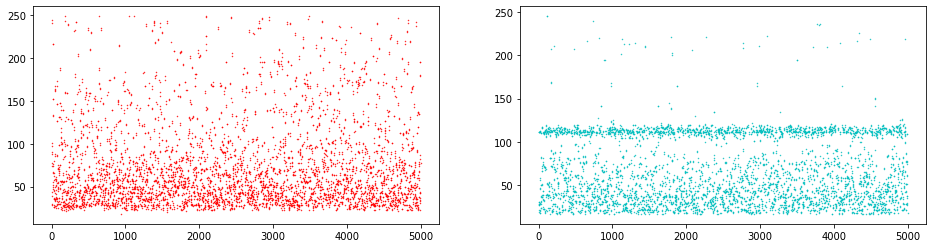

In [127]:
fig, axes = plt.subplots(ncols=, figsize=(16, 4))
axes[0].scatter(range(5000), dataSetArray[0, 0: 5000], s=0.2, c='r')
axes[1].scatter(range(5000), dataSetArray[800, 0: 5000], s=0.2, c='c')
plt.show()

In [146]:
index = np.random.randint(0, 7421, 4000)
x_train = dataSetCsv.values[index, 1: 5001]
y_train = dataSetCsv.values[index, -1]
x_train.shape, x_train[0], y_train

((4000, 5000),
 array([65., 34., 32., ..., 88., 46., 46.]),
 array([3., 1., 1., ..., 3., 2., 3.]))

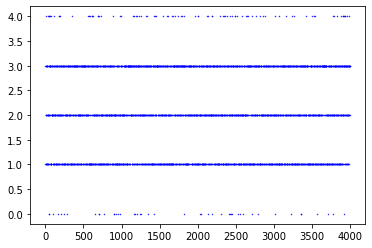

In [147]:
plt.scatter(range(len(index)), y_train, s=0.2, c='b')
plt.show()

In [148]:
lp_model = label_propagation.LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(x_train, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [149]:
index_y = np.random.randint(0, 7421, 3000)
x_test = dataSetCsv.values[index_y, 1: 5001]
y_test = dataSetCsv.values[index_y, -1]
x_test[0], y_test

(array([ 64., 144.,  51., ..., 201.,  47.,  46.]),
 array([3., 3., 1., ..., 3., 2., 3.]))

In [150]:
predicted_labels = lp_model.predict(x_test)
predicted_labels.shape

e:\anaconda\envs\deeplearning\lib\site-packages\sklearn\semi_supervised\label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


(3000,)

In [152]:
num1 = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i]==y_test[i]:
        num1 += 1
num1

1326

In [153]:
num1/3000

0.442

In [154]:
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(x_train, y_train)

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [155]:
result = label_spread.predict(x_test)
result.shape, result

((3000,), array([1., 1., 1., ..., 1., 1., 1.]))

In [156]:
num2 = 0
for i in range(len(result)):
    if result[i] == y_test[i]:
        num2 += 1
num2

903

In [159]:
def data_pca(x_train, x_test, COMPONENT_NUM):
    start = time.time()
    print("====>>===>>===>> PCA ")
    pca = PCA(n_components=COMPONENT_NUM, copy=True, whiten=False)  # 创建一个 PCA 对象
    pca.fit(x_train)    # 构建 PCA 模型
    pcaXTrain = pca.transform(x_train)
    pcaXTest = pca.transform(x_test)
    print('pca time is %0.3fs' % (time.time() - start))
    return pcaXTrain, pcaXTest

In [161]:
start = time.time()
pca_train, pca_test = data_pca(x_train, x_test, 0.95)
end = time.time()
print('time = %0.3fs' % (end - start))
pca_train.shape, pca_test.shape

====>>===>>===>> PCA 
pca time is 54.288s
time = 54.303s


((4000, 1916), (3000, 1916))

In [162]:
lp_model = label_propagation.LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(pca_train, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [164]:
PCApredict_labels = lp_model.predict(pca_test)
PCApredict_labels.shape, PCApredict_labels

e:\anaconda\envs\deeplearning\lib\site-packages\sklearn\semi_supervised\label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


((3000,), array([3., 3., 1., ..., 0., 0., 0.]))

In [165]:
num3 = 0
for i in range(len(PCApredict_labels)):
    if PCApredict_labels[i]==y_test[i]:
        num3 += 1
num3

1326

In [169]:
labels = dataSetCsv.values[:, -1]
num4 = 0
for i in range(len(labels)):
    if labels[i] == 0:
        num4 += 1
num4, labels

(104, array([0., 0., 0., ..., 3., 3., 3.]))

In [174]:
dataSet2 = dataSetCsv.values[104: ,1: 5001]
labels = dataSetCsv.values[104: ,-1 ]
dataSet2.shape, dataSet2[:4], labels

((7317, 5000), array([[ 23., 114., 114., ...,  38., 113., 113.],
        [110., 107.,  36., ...,  29.,  20.,  18.],
        [ 33.,  53.,  53., ...,  45.,  59.,  57.],
        [110., 113.,  38., ...,  46.,  46.,  44.]]), array([1., 1., 1., ..., 3., 3., 3.]))

In [176]:
index1 = np.random.randint(0, dataSet2.shape[0], 5000)
index2 = np.random.randint(0, dataSet2.shape[0], 2000)
x_train1 = dataSet2[index1]
y_train1 = labels[index1]
x_test1 = dataSet2[index2]
y_test1 = labels[index2]
x_train1, y_train1, x_test1, y_test1

(array([[ 46.,  46.,  52., ..., 106., 107.,  21.],
        [ 40.,  44.,  45., ...,  22.,  22., 111.],
        [ 27.,  27.,  27., ...,  36.,  36.,  37.],
        ...,
        [ 66., 112., 113., ...,  21.,  44.,  60.],
        [ 25., 112.,  82., ..., 111.,  82.,  55.],
        [ 34.,  37.,  26., ..., 113., 110.,  45.]]),
 array([1., 1., 2., ..., 1., 2., 2.]),
 array([[ 41.,  43.,  37., ...,  19.,  19.,  16.],
        [ 37.,  42.,  29., ...,  55., 174., 173.],
        [195., 195., 145., ...,  20.,  22., 220.],
        ...,
        [ 99.,  96., 217., ...,  16., 115., 116.],
        [178.,  21.,  23., ..., 116., 189., 189.],
        [ 38.,  36.,  62., ..., 109.,  60.,  60.]]),
 array([3., 2., 3., ..., 3., 3., 1.]))

In [177]:
pca_train1, pca_test1 = data_pca(x_train1, x_test1, 0.95)
pca_train1.shape, pca_test1.shape

====>>===>>===>> PCA 
pca time is 78.264s


((5000, 2116), (2000, 2116))

In [178]:
lp_model1 = label_propagation.LabelSpreading(gamma=.25, max_iter=20)
lp_model1.fit(pca_train1, y_train1)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [185]:
re1 = lp_model1.predict(pca_test1)
re1.shape, re1

e:\anaconda\envs\deeplearning\lib\site-packages\sklearn\semi_supervised\label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


((2000,), array([3., 1., 3., ..., 1., 1., 1.]))

In [186]:
num5 = 0
for i in range(len(re1)):
    if re1[i] == y_test1[i]:
        num5 += 1
num5

1315

In [187]:
1315/2000

0.6575

In [188]:
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(pca_train1, y_train1)

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [189]:
result = label_spread.predict(pca_test1)
result.shape, result

((2000,), array([1., 1., 1., ..., 1., 1., 1.]))

In [190]:
num6 = 0
for i in range(len(result)):
    if result[i] == y_test1[i]:
        num6 += 1
num6

615

In [ ]:
digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

# #############################################################################
# Learn with LabelSpreading
lp_model = label_propagation.LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()


In [196]:
rng = np.random.RandomState(2)
indices = np.arange(200)
print(indices)
rng.shuffle(indices)
rng, indices

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


(<mtrand.RandomState at 0x1afa8477b38>,
 array([112,  29, 182, 199, 193,  85,  10,  54, 115,  35,  12,  92,  13,
        126, 174,   2,  44,   3, 113,  14,  23,  25,   6, 134, 165, 173,
         45,  65,  48, 122, 178,  64,   9,  57,  78,  71, 128, 176, 131,
         53, 137, 163, 111, 123, 109, 141,  41, 130, 140,   5, 159, 100,
         11, 187,  24,  89,  66,   8, 172, 175,  28, 133,  94,  42, 169,
         82, 184, 106, 108, 143, 180, 166, 146,  79,   1, 119, 192, 149,
        160, 188, 147,  36, 171, 179,  62,   0,  27, 157,  98, 118,  20,
        158, 156, 142,  77,  30, 154,  17,  59, 181, 114, 127, 139, 191,
         93, 151,  21,  55,  16, 152,  91,  99, 120, 197,  74, 190, 161,
        144, 196,  87,  90,  84,  18,  97, 101, 125, 164, 135,  61,  81,
         68, 129,  56,  19,  86,  70,  60,  34,  40, 138,  76, 153,  26,
         32, 195,  96,  83, 110, 105,  73, 117, 150, 145, 155, 198, 136,
         39,  49, 186, 132,  50,  52,  80, 185, 121, 189,  46,  88,  69,
         67

In [199]:
indices = np.arange(100)

unlabeled_set = indices[40:]
unlabeled_set

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
frd = pd.read_csv('../Cs137data/re_bp_SetData.csv')
frd

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,97.0,101.0,77.0,74.0,90.0,88.0,30.0,29.0,241.0,...,37.0,33.0,195.0,196.0,34.0,31.0,42.0,44.0,77.0,0.0
1,1,79.0,74.0,141.0,143.0,235.0,237.0,32.0,31.0,68.0,...,90.0,88.0,31.0,31.0,58.0,60.0,28.0,27.0,26.0,0.0
2,2,82.0,85.0,51.0,51.0,52.0,53.0,119.0,119.0,152.0,...,38.0,67.0,66.0,134.0,134.0,32.0,33.0,98.0,100.0,0.0
3,3,46.0,49.0,30.0,29.0,85.0,85.0,62.0,62.0,245.0,...,34.0,103.0,101.0,52.0,52.0,82.0,78.0,46.0,46.0,0.0
4,4,50.0,50.0,232.0,232.0,30.0,36.0,180.0,181.0,88.0,...,53.0,58.0,45.0,43.0,67.0,67.0,64.0,63.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,7416,134.0,135.0,42.0,43.0,35.0,35.0,30.0,18.0,42.0,...,183.0,184.0,218.0,217.0,21.0,22.0,199.0,156.0,157.0,3.0
7417,7417,77.0,77.0,111.0,111.0,91.0,93.0,220.0,56.0,57.0,...,47.0,90.0,82.0,81.0,63.0,63.0,118.0,55.0,55.0,3.0
7418,7418,192.0,195.0,22.0,121.0,64.0,20.0,45.0,47.0,198.0,...,44.0,38.0,38.0,55.0,56.0,191.0,189.0,222.0,225.0,3.0
7419,7419,172.0,170.0,19.0,21.0,111.0,113.0,122.0,120.0,99.0,...,196.0,89.0,88.0,30.0,31.0,163.0,164.0,189.0,188.0,3.0


In [4]:
frd.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,...,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,3710.000000,83.058348,82.463145,81.464627,82.321251,83.353861,82.695459,83.177335,83.223555,82.930468,...,82.579302,82.454117,81.889233,82.034092,82.729686,82.112384,82.441719,81.792211,82.576876,2.085703
std,2142.402507,58.172014,57.942179,58.023271,57.505915,58.046826,58.204398,58.353272,58.126885,57.730812,...,57.628229,56.943716,57.451511,57.664952,58.044329,57.181736,57.765123,57.563320,57.764562,0.896797
min,0.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000
25%,1855.000000,36.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,36.000000,36.000000,...,35.000000,36.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,1.000000
50%,3710.000000,64.000000,63.000000,62.000000,64.000000,65.000000,64.000000,64.000000,64.000000,65.000000,...,64.000000,65.000000,64.000000,64.000000,63.000000,63.000000,63.000000,63.000000,65.000000,2.000000
75%,5565.000000,114.000000,113.000000,113.000000,113.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,113.000000,113.000000,113.000000,114.000000,113.000000,113.000000,113.000000,113.000000,3.000000
max,7420.000000,246.000000,249.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,249.000000,...,249.000000,248.000000,246.000000,247.000000,248.000000,244.000000,249.000000,246.000000,249.000000,4.000000


In [13]:
labels = frd.values[:, -1]
labels

array([0., 0., 0., ..., 3., 3., 3.])

In [37]:
DataSet = frd.values[:, 1: 5001]
Co_data = DataSet[np.where(labels == 2)[0]]
Co_data, Co_data.shape

(array([[ 21.,  36.,  24., ..., 144., 146.,  19.],
        [ 18.,  97.,  97., ..., 188.,  30.,  31.],
        [113., 114., 113., ...,  68., 101.,  22.],
        ...,
        [ 54.,  56., 115., ...,  30.,  31.,  32.],
        [226., 226.,  28., ...,  63.,  64.,  80.],
        [111.,  71.,  35., ...,  56.,  57.,  38.]]), (2188, 5000))

In [38]:
Cs_data = DataSet[np.where(labels[:] == 1)[0]]
Cs_data

array([[ 23., 114., 114., ...,  38., 113., 113.],
       [110., 107.,  36., ...,  29.,  20.,  18.],
       [ 33.,  53.,  53., ...,  45.,  59.,  57.],
       ...,
       [ 74.,  32.,  32., ...,  36.,  36.,  49.],
       [ 52.,  24.,  25., ...,  35.,  57.,  58.],
       [ 45.,  46., 141., ..., 108., 109.,  73.]])

In [33]:
Co_data = np.vstack((Co_data[:100, ], Cs_data[:100, ]))
Co_data.shape

(200, 5000)

In [35]:
fr = pd.DataFrame(Co_data)
fr

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,21.0,36.0,24.0,30.0,26.0,19.0,20.0,194.0,195.0,166.0,...,48.0,37.0,78.0,79.0,19.0,148.0,147.0,144.0,146.0,19.0
1,18.0,97.0,97.0,37.0,40.0,75.0,78.0,69.0,69.0,115.0,...,124.0,128.0,158.0,24.0,25.0,21.0,188.0,188.0,30.0,31.0
2,113.0,114.0,113.0,112.0,239.0,242.0,225.0,96.0,52.0,17.0,...,30.0,23.0,28.0,29.0,116.0,114.0,28.0,68.0,101.0,22.0
3,22.0,69.0,32.0,27.0,25.0,26.0,26.0,49.0,50.0,16.0,...,20.0,30.0,25.0,42.0,44.0,50.0,24.0,23.0,65.0,68.0
4,50.0,49.0,221.0,21.0,23.0,109.0,25.0,22.0,76.0,79.0,...,113.0,23.0,192.0,110.0,37.0,38.0,31.0,28.0,64.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,60.0,42.0,42.0,112.0,114.0,110.0,111.0,117.0,117.0,18.0,...,35.0,22.0,69.0,70.0,71.0,71.0,58.0,59.0,41.0,38.0
196,43.0,43.0,30.0,31.0,52.0,55.0,112.0,113.0,60.0,61.0,...,33.0,24.0,21.0,113.0,113.0,25.0,49.0,50.0,108.0,109.0
197,43.0,41.0,27.0,24.0,21.0,38.0,38.0,79.0,78.0,112.0,...,115.0,112.0,108.0,23.0,26.0,26.0,20.0,20.0,22.0,25.0
198,31.0,28.0,32.0,31.0,72.0,73.0,68.0,69.0,43.0,43.0,...,36.0,35.0,65.0,65.0,54.0,55.0,107.0,106.0,110.0,110.0


In [36]:
fr.to_excel('../Cs137data/CoCs_200data.xlsx')

In [41]:
fr1 = pd.DataFrame(Co_data[:200, :])
fr2 = pd.DataFrame(Cs_data[:200, :])
fr1

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,21.0,36.0,24.0,30.0,26.0,19.0,20.0,194.0,195.0,166.0,...,48.0,37.0,78.0,79.0,19.0,148.0,147.0,144.0,146.0,19.0
1,18.0,97.0,97.0,37.0,40.0,75.0,78.0,69.0,69.0,115.0,...,124.0,128.0,158.0,24.0,25.0,21.0,188.0,188.0,30.0,31.0
2,113.0,114.0,113.0,112.0,239.0,242.0,225.0,96.0,52.0,17.0,...,30.0,23.0,28.0,29.0,116.0,114.0,28.0,68.0,101.0,22.0
3,22.0,69.0,32.0,27.0,25.0,26.0,26.0,49.0,50.0,16.0,...,20.0,30.0,25.0,42.0,44.0,50.0,24.0,23.0,65.0,68.0
4,50.0,49.0,221.0,21.0,23.0,109.0,25.0,22.0,76.0,79.0,...,113.0,23.0,192.0,110.0,37.0,38.0,31.0,28.0,64.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,98.0,99.0,39.0,40.0,202.0,200.0,45.0,44.0,43.0,54.0,...,199.0,16.0,113.0,62.0,69.0,72.0,34.0,18.0,65.0,55.0
196,81.0,80.0,107.0,110.0,31.0,31.0,122.0,120.0,112.0,79.0,...,71.0,111.0,112.0,135.0,53.0,52.0,50.0,50.0,29.0,85.0
197,81.0,44.0,147.0,149.0,114.0,111.0,29.0,95.0,98.0,112.0,...,110.0,18.0,16.0,148.0,117.0,110.0,113.0,38.0,20.0,77.0
198,61.0,60.0,94.0,95.0,48.0,49.0,27.0,128.0,131.0,25.0,...,76.0,26.0,25.0,31.0,30.0,26.0,26.0,105.0,36.0,39.0


In [42]:
fr2

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,23.0,114.0,114.0,117.0,116.0,36.0,35.0,28.0,25.0,24.0,...,22.0,20.0,56.0,110.0,109.0,116.0,116.0,38.0,113.0,113.0
1,110.0,107.0,36.0,37.0,112.0,113.0,75.0,19.0,107.0,106.0,...,38.0,108.0,109.0,80.0,79.0,45.0,46.0,29.0,20.0,18.0
2,33.0,53.0,53.0,32.0,33.0,82.0,82.0,29.0,34.0,32.0,...,118.0,19.0,19.0,43.0,96.0,99.0,46.0,45.0,59.0,57.0
3,110.0,113.0,38.0,38.0,27.0,125.0,27.0,32.0,28.0,27.0,...,39.0,40.0,43.0,23.0,23.0,37.0,40.0,46.0,46.0,44.0
4,43.0,110.0,110.0,34.0,53.0,52.0,117.0,117.0,114.0,113.0,...,94.0,49.0,62.0,63.0,68.0,66.0,45.0,113.0,116.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,59.0,58.0,23.0,22.0,134.0,71.0,16.0,16.0,31.0,32.0,...,37.0,38.0,57.0,60.0,31.0,29.0,34.0,113.0,115.0,53.0
196,54.0,25.0,36.0,38.0,48.0,49.0,23.0,112.0,114.0,18.0,...,73.0,115.0,113.0,57.0,58.0,66.0,65.0,46.0,112.0,112.0
197,113.0,111.0,38.0,40.0,18.0,39.0,37.0,117.0,117.0,172.0,...,74.0,130.0,128.0,65.0,64.0,32.0,30.0,67.0,69.0,23.0
198,20.0,114.0,117.0,85.0,83.0,78.0,77.0,61.0,61.0,114.0,...,31.0,21.0,60.0,58.0,17.0,17.0,18.0,117.0,116.0,39.0


In [43]:
fr1.to_excel('../Cs137data/Co_200data.xlsx')
fr2.to_excel('../Cs137data/Cs_200data.xlsx')